In [16]:
from CLOGP import MGmB, MGE, MGE_Ordenado, calculo_S, batche, calcula_p_chapeu, calculo_accuracy, calcular_erro, sigmoid, sinal
from CLogDKPd import threshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
# carregar dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
def exhaustive_code(k):
    segment_length = 2**(k-1) - 1
    codes = []
    # Vamos admitir que irá sempre receber k=4
    codes.append([1]*segment_length)

    row = []
    segment_length = 2**(k-2)
    row.extend([0] * segment_length)
    row.extend([1] * (segment_length - 1))
    codes.append(row)
    
    row = []
    segment_length = 2**(k-3)
    row.extend([0] * segment_length)
    row.extend([1] * segment_length)
    row.extend([0] * segment_length)
    row.extend([1] * (segment_length - 1))
    codes.append(row)

    codes.append([0,1,0,1,0,1,0])
    
    return codes

k = 4
code = exhaustive_code(k)
for row in code:
    print(row)

[1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 1, 1, 0, 0, 1]
[0, 1, 0, 1, 0, 1, 0]


In [18]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [19]:
train_filter = np.where((y_train == 0) | (y_train == 1) | (y_train == 2) | (y_train == 3))
test_filter = np.where((y_test == 0) | (y_test == 1) | (y_test == 2) | (y_test == 3))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

In [20]:
x_train_filter, y_train_filter = select_first_n_per_class(x_train, y_train, 100)
x_test_filter, y_test_filter = select_first_n_per_class(x_test, y_test, 100)

x_train_array = x_train_filter.reshape((len(x_train_filter), 784))
x_test_array = x_test_filter.reshape((len(x_test_filter), 784))
x_train_filter = x_train_array.astype('float32')
x_test_filter = x_test_array.astype('float32')

x_train_filter = np.hstack((np.ones((x_train_filter.shape[0], 1)), x_train_filter))
x_test_filter = np.hstack((np.ones((x_test_filter.shape[0], 1)), x_test_filter))

In [21]:
'''
indices = np.random.permutation(len(x_train_filter))
x_train_filter = x_train_filter[indices]
y_train_filter = y_train_filter[indices]
'''

'\nindices = np.random.permutation(len(x_train_filter))\nx_train_filter = x_train_filter[indices]\ny_train_filter = y_train_filter[indices]\n'

X shape: (400, 785)


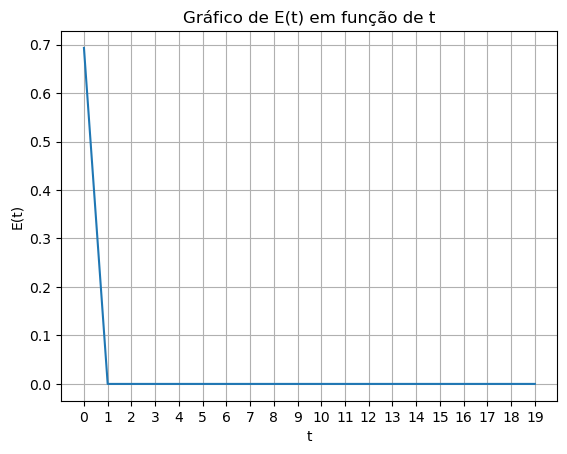

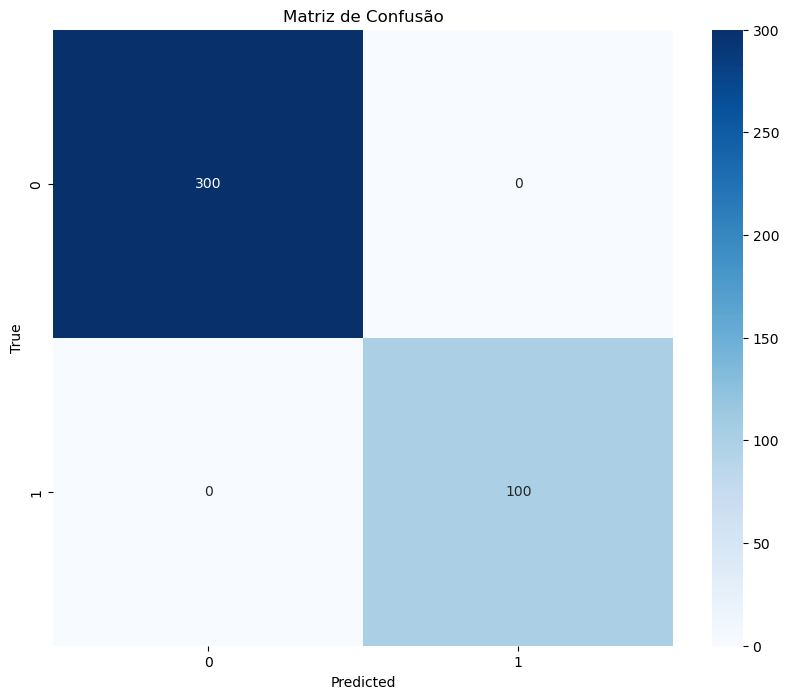

In [22]:
# 1 - para diferenciar 0 do resto 
# [1,0,0,0]

y_train_1 = [1 if (x == 0) else 0 for x in y_train_filter]
y_test_1 = [1 if (x == 0) else 0 for x in y_test_filter]

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
w_1, E_1 = MGmB(x_train_filter, y_train_1, w0, eta,batch_size,epochs)
#w_1, E_1 = MGE(x_train_filter, y_train_1, w0, eta,epochs)
#w_1, E_1 = MGE_Ordenado(x_train_filter, y_train_1, w0, eta,epochs)
t = list(range(len(E_1)))

# Plotando o gráfico
plt.plot(t, E_1, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_1*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_1, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)


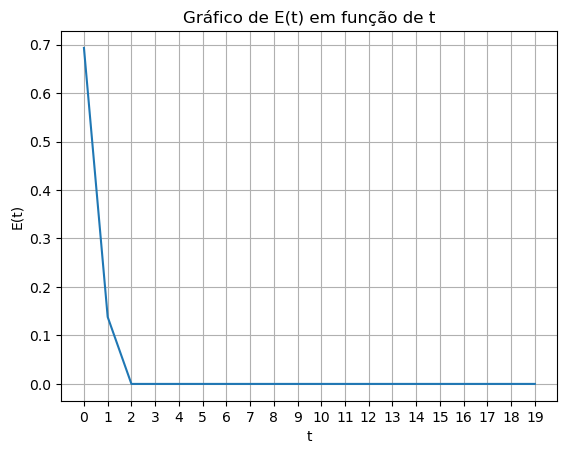

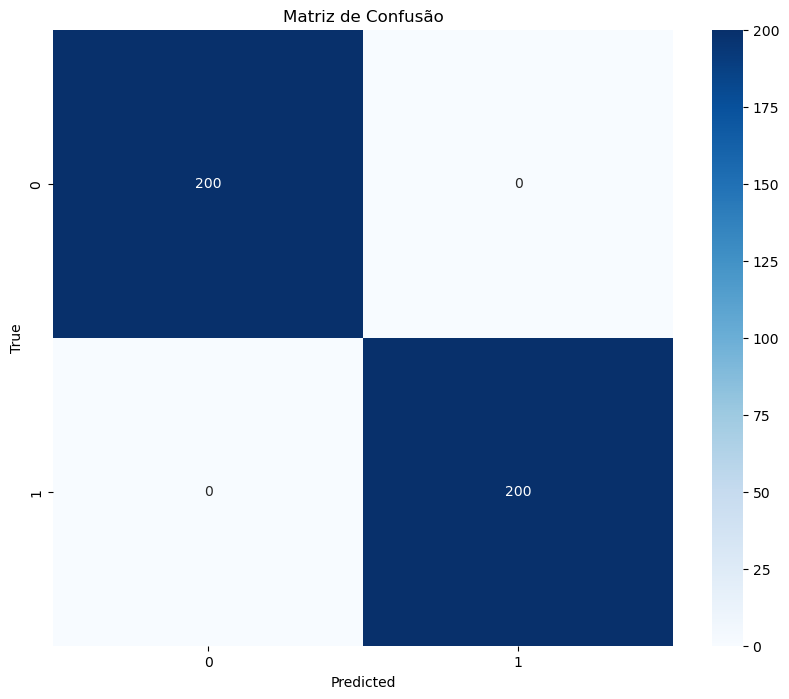

In [23]:
# 2 - para diferenciar 0 e 3 do resto 
# [1,0,0,1]

y_train_2 = [1 if (x in [0,3]) else 0 for x in y_train_filter]
y_test_2 = [1 if (x in [0,3]) else 0 for x in y_test_filter]

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
w_2, E_2 = MGmB(x_train_filter, y_train_2, w0, eta,batch_size,epochs)
#w_2, E_2 = MGE(x_train_filter, y_train_2, w0, eta,epochs)
#w_2, E_2 = MGE_Ordenado(x_train_filter, y_train_2, w0, eta,epochs)
t = list(range(len(E_2)))

# Plotando o gráfico
plt.plot(t, E_2, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_2*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_2, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)


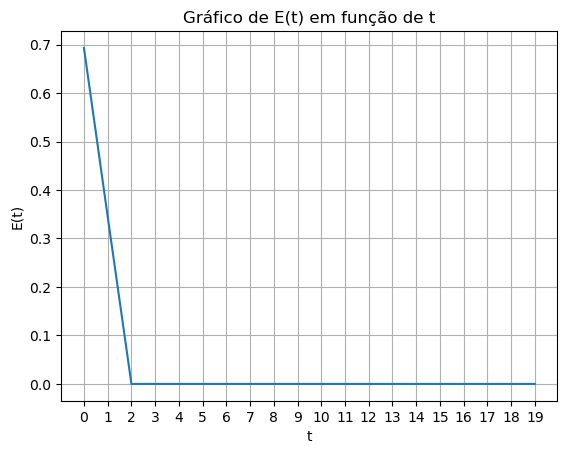

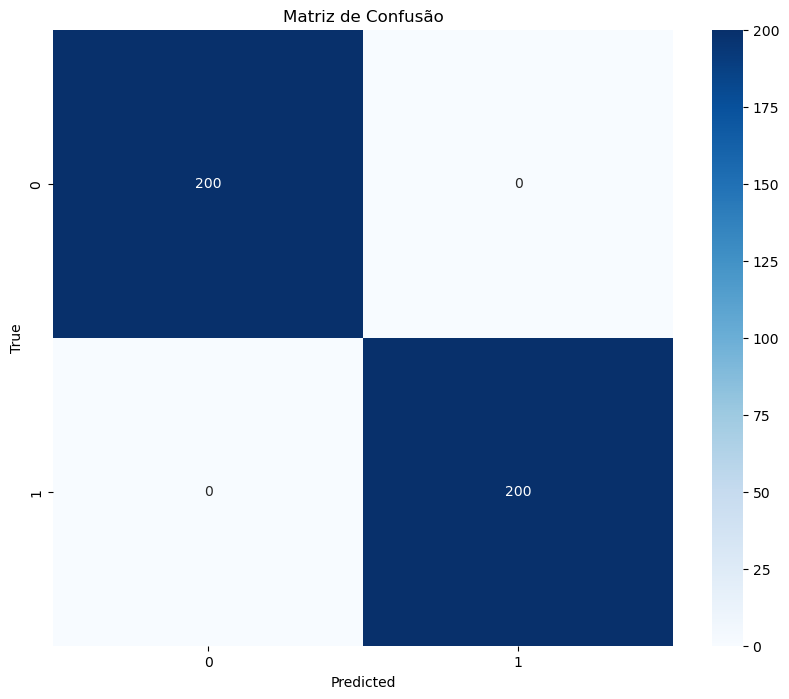

In [24]:
# 3 - [1,0,1,0]

y_train_3 = [1 if (x in [0,2]) else 0 for x in y_train_filter]
y_test_3 = [1 if (x in [0,2]) else 0 for x in y_test_filter]

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
w_3, E_3 = MGmB(x_train_filter, y_train_3, w0, eta,batch_size,epochs)
#w_3, E_3 = MGE(x_train_filter, y_train_3, w0, eta,epochs)
#w_3, E_3 = MGE_Ordenado(x_train_filter, y_train_3, w0, eta,epochs)
t = list(range(len(E_3)))

# Plotando o gráfico
plt.plot(t, E_3, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_3*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_3, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)


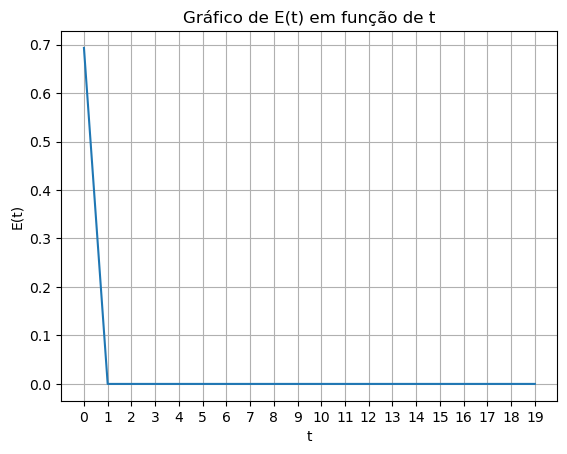

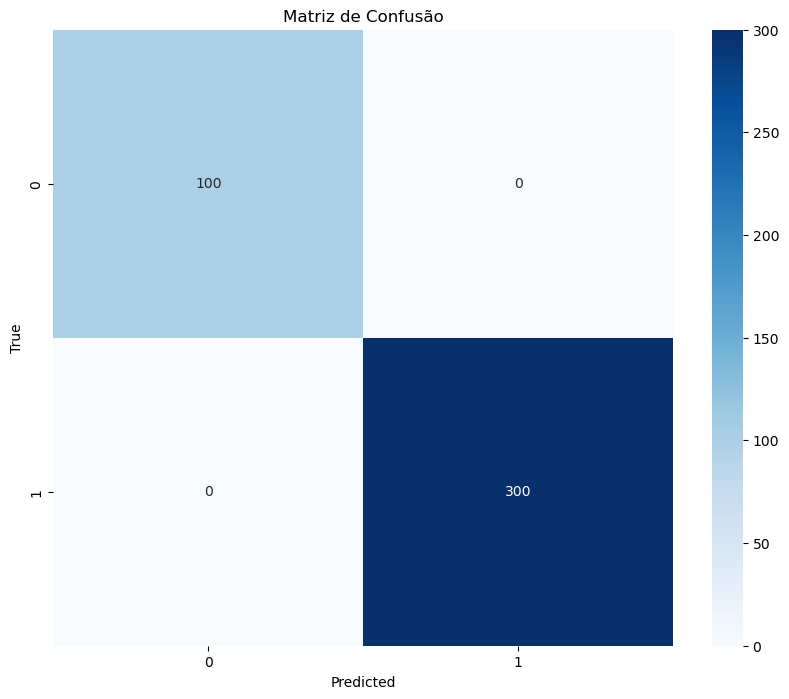

In [25]:
# 4 - [1,0,1,1]

y_train_4 = [1 if (x in [0,2,3]) else 0 for x in y_train_filter]
y_test_4 = [1 if (x in [0,2,3]) else 0 for x in y_test_filter]

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
w_4, E_4 = MGmB(x_train_filter, y_train_4, w0, eta,batch_size,epochs)
#w_4, E_4 = MGE(x_train_filter, y_train_4, w0, eta,epochs)
#w_4, E_4 = MGE_Ordenado(x_train_filter, y_train_4, w0, eta,epochs)
t = list(range(len(E_4)))

# Plotando o gráfico
plt.plot(t, E_4, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_4*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_4, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)


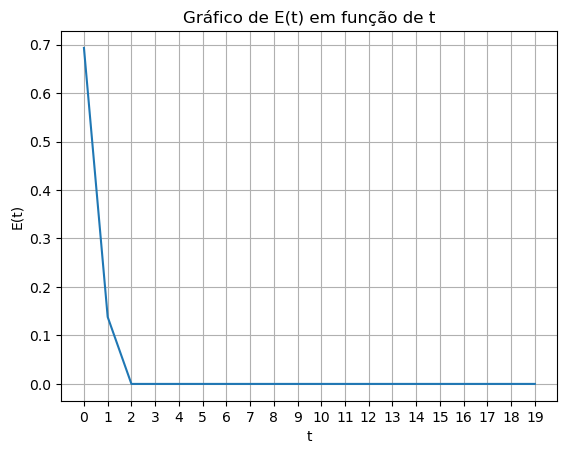

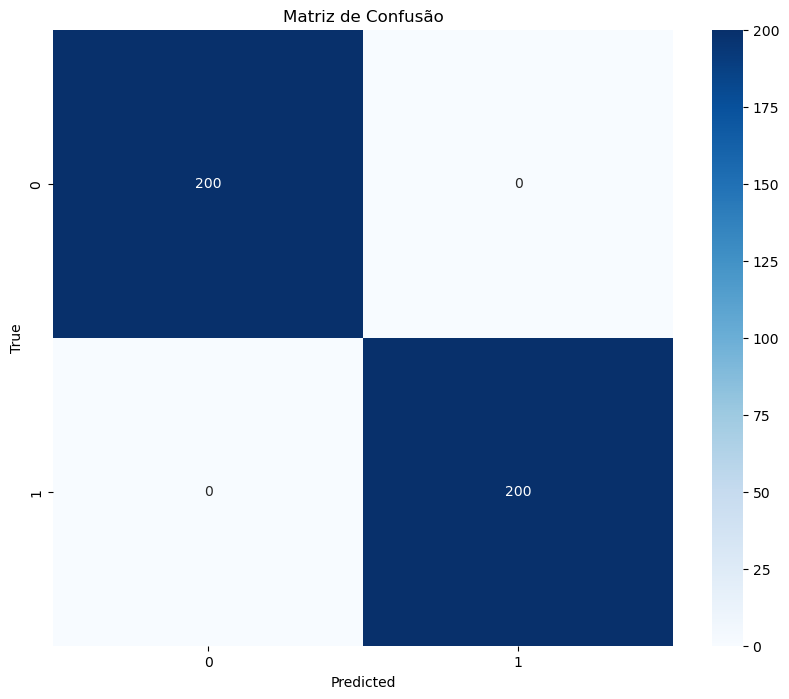

In [26]:
# 5 - [1,1,0,0]

y_train_5 = [1 if (x in [0,1]) else 0 for x in y_train_filter]
y_test_5 = [1 if (x in [0,1]) else 0 for x in y_test_filter]

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
w_5, E_5 = MGmB(x_train_filter, y_train_5, w0, eta,batch_size,epochs)
#w_5, E_5 = MGE(x_train_filter, y_train_5, w0, eta,epochs)
#w_5, E_5 = MGE_Ordenado(x_train_filter, y_train_5, w0, eta,epochs)
t = list(range(len(E_5)))

# Plotando o gráfico
plt.plot(t, E_5, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_5*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_5, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)


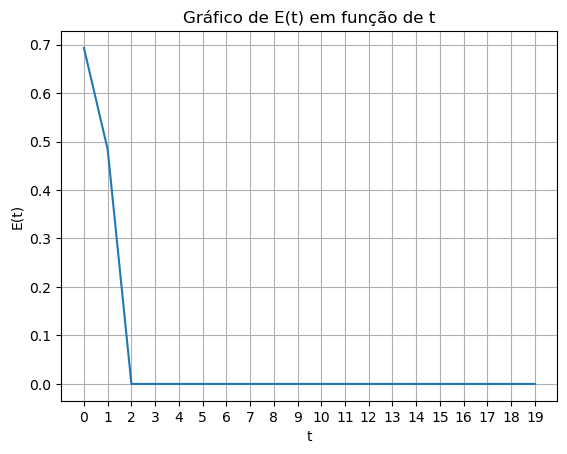

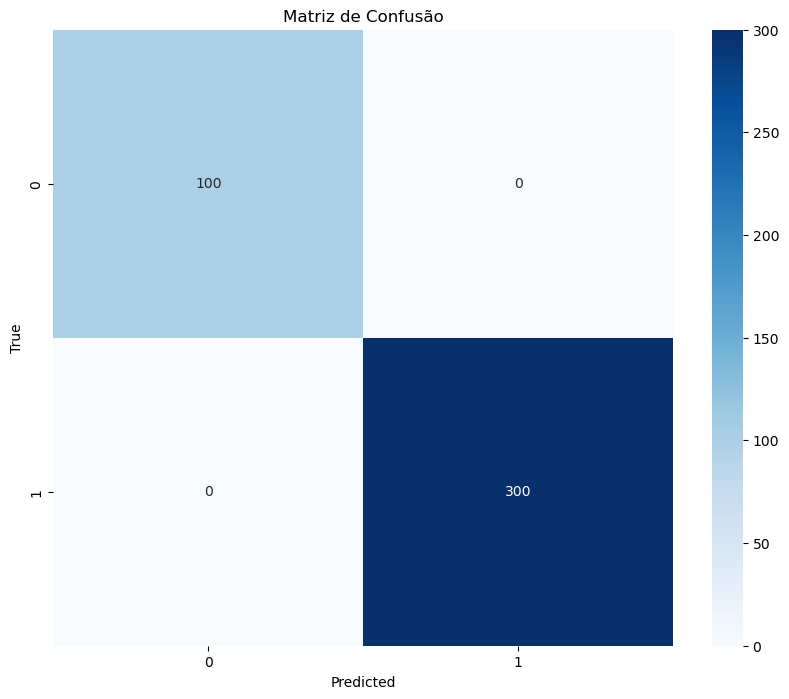

In [27]:
# 6 - [1,1,0,1]

y_train_6 = [1 if (x in [0,1,3]) else 0 for x in y_train_filter]
y_test_6 = [1 if (x in [0,1,3]) else 0 for x in y_test_filter]

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
w_6, E_6 = MGmB(x_train_filter, y_train_6, w0, eta,batch_size,epochs)
#w_6, E_6 = MGE(x_train_filter, y_train_6, w0, eta,epochs)
#w_6, E_6 = MGE_Ordenado(x_train_filter, y_train_6, w0, eta,epochs)
t = list(range(len(E_6)))

# Plotando o gráfico
plt.plot(t, E_6, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()
A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_6*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_6, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (400, 785)


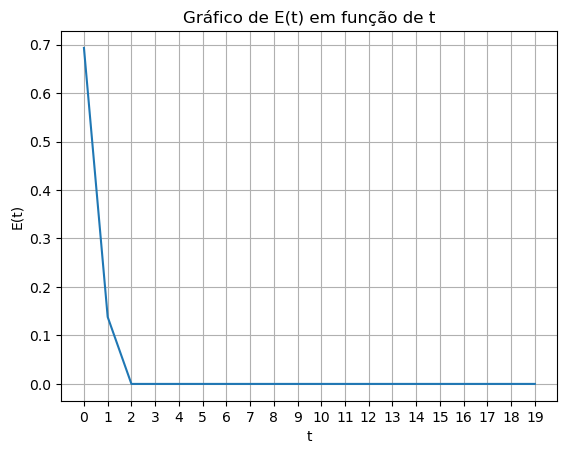

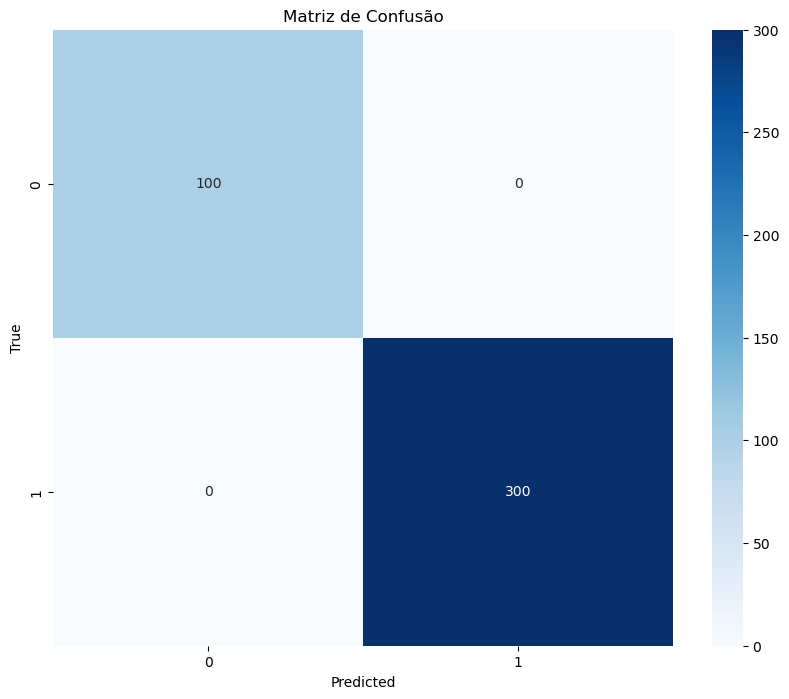

In [28]:
# 7 - [1,1,1,0]

y_train_7 = [1 if (x in [0,1,2]) else 0 for x in y_train_filter]
y_test_7 = [1 if (x in [0,1,2]) else 0 for x in y_test_filter]

print('X shape:', x_train_filter.shape)
eta = 0.5
epochs = 1000
w0 = np.zeros(785)
batch_size = len(x_train_filter)
w_7, E_7 = MGmB(x_train_filter, y_train_7, w0, eta,batch_size,epochs)
#w_7, E_7 = MGE(x_train_filter, y_train_7, w0, eta,epochs)
#w_7, E_7 = MGE_Ordenado(x_train_filter, y_train_7, w0, eta,epochs)
t = list(range(len(E_7)))

# Plotando o gráfico
plt.plot(t, E_7, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

A=np.dot(x_test_filter,x_test_filter.T)
y_chapeu_all = []
for n in range(len(x_train_filter)):
    p_chapeu = sigmoid(sum(w_7*x_train_filter[n]))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_7, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
previsoes = []
for i in range(len(x_test_filter)):
    elemento = x_test_filter[i]
    p_chapeu_1 = threshold(sigmoid(np.dot(w_1,elemento)))
    p_chapeu_2 = threshold(sigmoid(np.dot(w_2,elemento)))
    p_chapeu_3 = threshold(sigmoid(np.dot(w_3,elemento)))
    p_chapeu_4 = threshold(sigmoid(np.dot(w_4,elemento)))
    p_chapeu_5 = threshold(sigmoid(np.dot(w_5,elemento)))
    p_chapeu_6 = threshold(sigmoid(np.dot(w_6,elemento)))
    p_chapeu_7 = threshold(sigmoid(np.dot(w_7,elemento)))

    distancia = [0.0, 0.0, 0.0, 0.0]

    concate_p_chapeu =  [p_chapeu_1, p_chapeu_2, p_chapeu_3, p_chapeu_4, p_chapeu_5, p_chapeu_6, p_chapeu_7]

    for m in range(4):
        distancia[m] += sum(el1 != el2 for el1, el2 in zip(concate_p_chapeu, code[m]))

    a=(np.argmin(distancia))
    previsoes.append(a)

    '''
    print(f"{a}, {y_test_filter[i]}")

    if a == y_test_filter[i]:
        print("ACERTOU")
    else:
        print("ERRADO")
    '''

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


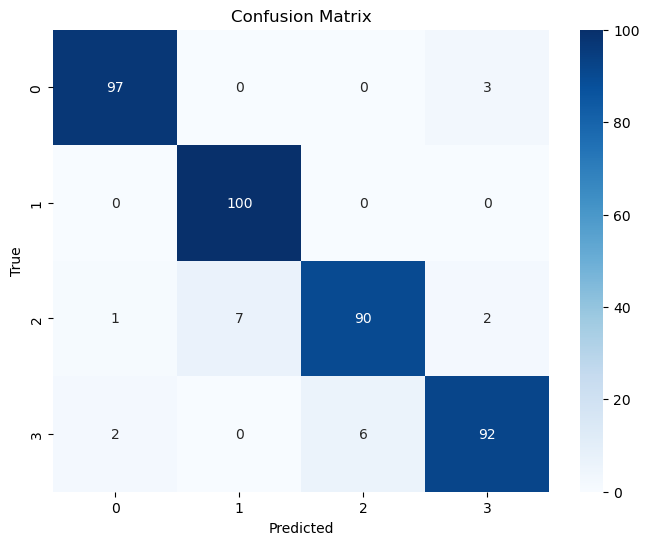

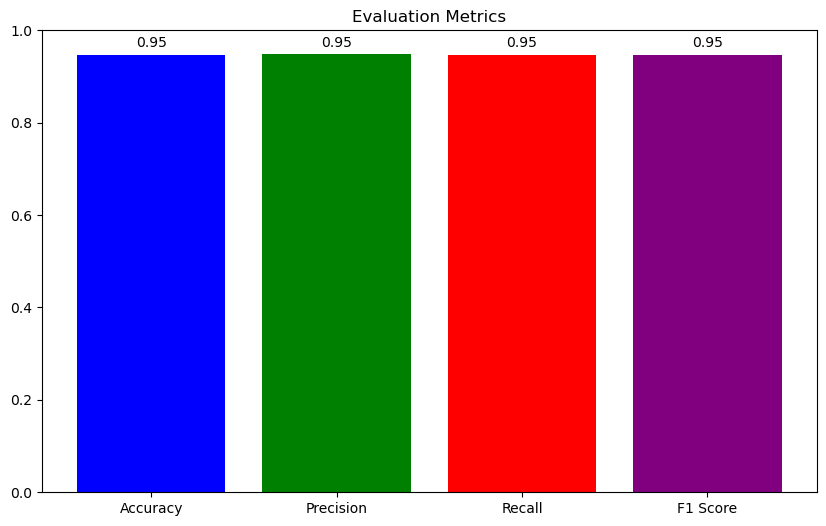


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97       100
     Class 1       0.93      1.00      0.97       100
     Class 2       0.94      0.90      0.92       100
     Class 3       0.95      0.92      0.93       100

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [30]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que Y_testes e previsoes já estejam definidos
# Y_testes = np.array([...])
# previsoes = np.array([...])

# Calculando as métricas
accuracy = accuracy_score(y_test_filter, previsoes)
precision = precision_score(y_test_filter, previsoes, average='macro')
recall = recall_score(y_test_filter, previsoes, average='macro')
f1 = f1_score(y_test_filter, previsoes, average='macro')

# Imprimindo as métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test_filter, previsoes)

# Gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_filter), yticklabels=np.unique(y_test_filter))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Gráfico das métricas
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')

# Adicionando os valores a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

# Nomes das classes dinamicamente
classes = np.unique(y_test_filter)
class_names = [f'Class {cls}' for cls in classes]

# Relatório de classificação completo
report = classification_report(y_test_filter, previsoes, target_names=class_names)
print('\nClassification Report:\n', report)
